In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore future_warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Load dataframes
df_results = pd.read_csv('/content/drive/MyDrive/GreenFlashProject/processed_data/results_df.csv')
df_results_2 = pd.read_csv('/content/drive/MyDrive/GreenFlashProject/processed_data/results_df-2.csv')
df_results_3 = pd.read_csv('/content/drive/MyDrive/GreenFlashProject/processed_data/results_df-3.csv')

In [ ]:
# Concatenate all datasets
df_results = pd.concat([df_results,df_results_2, df_results_3], axis=0 )

In [ ]:
# Sort, define wich models used GPU and create a column with emissions *1000 to see clearly differences
df_results.sort_values(by=['Dataset','Model'], ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)
df_results['Adjusted Prediction Emissions (kg CO2e)*1000'] = (df_results['Adjusted Prediction Emissions (kg CO2e)']*1000).round(2)
df_results['GPU'] = [1 if 'RoBERTa' in model else 0 for model in df_results['Model']]

In [ ]:
df_results.head(3)

,Model,Dataset,Training Time (s),Original Prediction Time (s),Adjusted Prediction Time (s),Training Emissions (kg CO2e),Original Prediction Emissions (kg CO2e),Adjusted Prediction Emissions (kg CO2e),Accuracy,Precision,Recall,F1-Score,Adjusted Prediction Emissions (kg CO2e)*1000,GPU
0,XGBoost,df_synthetic_chats,0.970652,0.004338,0.021689,0.000024,0.000025,0.000123,0.901408,0.900731,0.901408,0.900868,0.12,0
1,VADER,df_synthetic_chats,0.000000,0.231574,0.231574,0.000000,0.000002,0.000002,0.569144,0.722102,0.569144,0.518853,0.00,0
2,Spacy_transformer,df_synthetic_chats,0.000000,22.392533,22.392533,0.000000,0.000290,0.000290,0.559737,0.612905,0.559737,0.518574,0.29,0




---



---



### Here we have plots for each metric with every model and dataset.


- Please take into account that **RoBERTa** was included only for cost comparison purposes, as **the metrics** with the short and large chat datasets are **not realistic**. This is because RoBERTa was used to automatically label them, resulting in perfect scores.


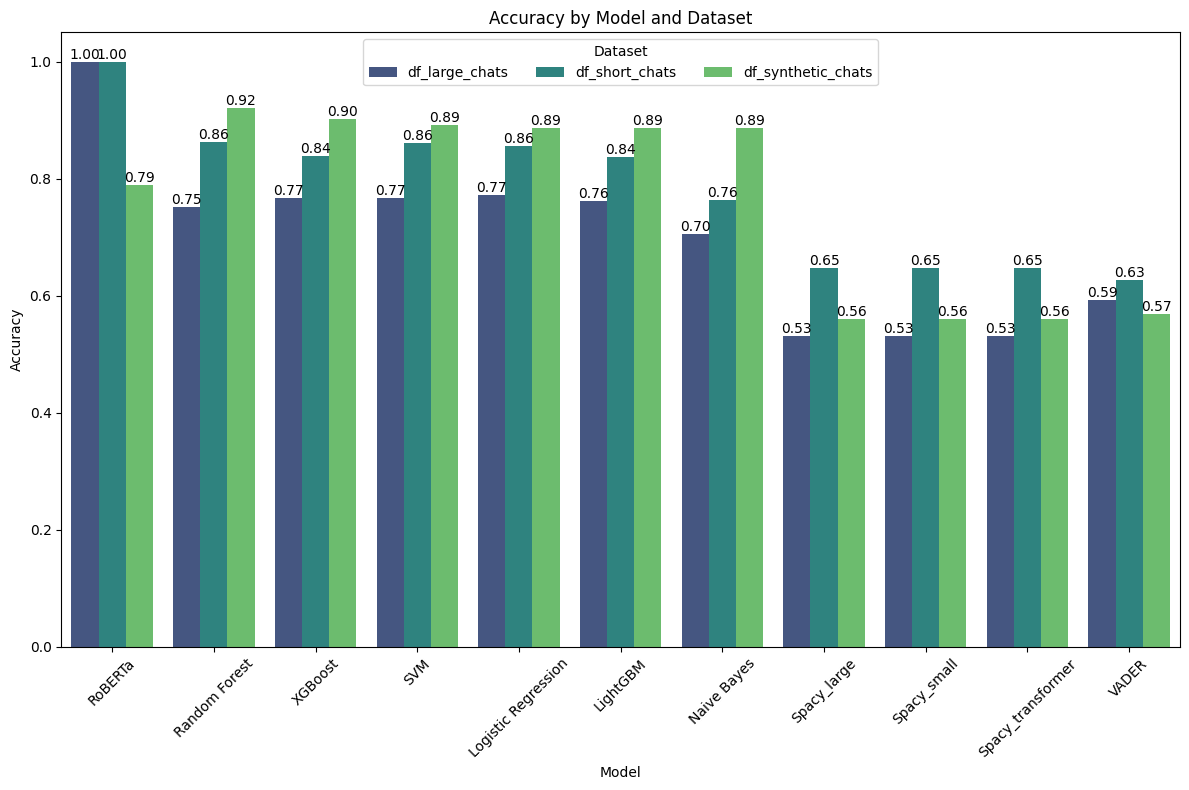

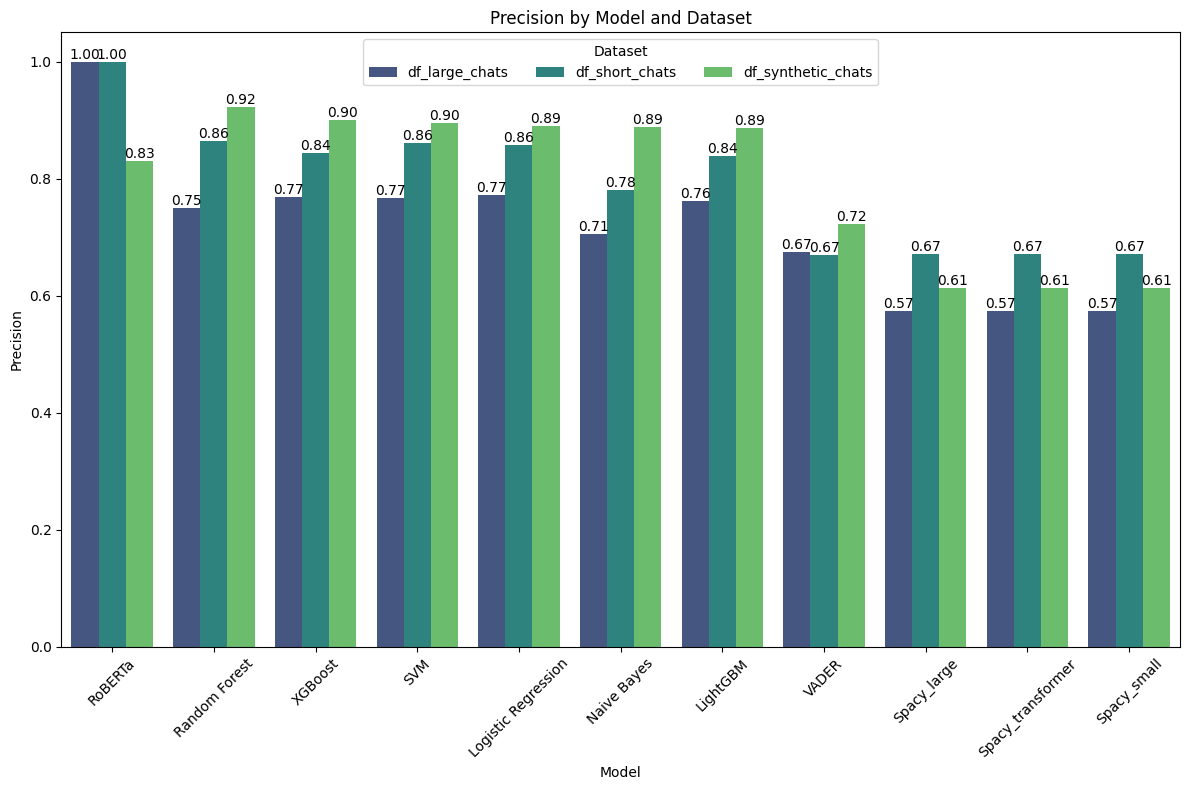

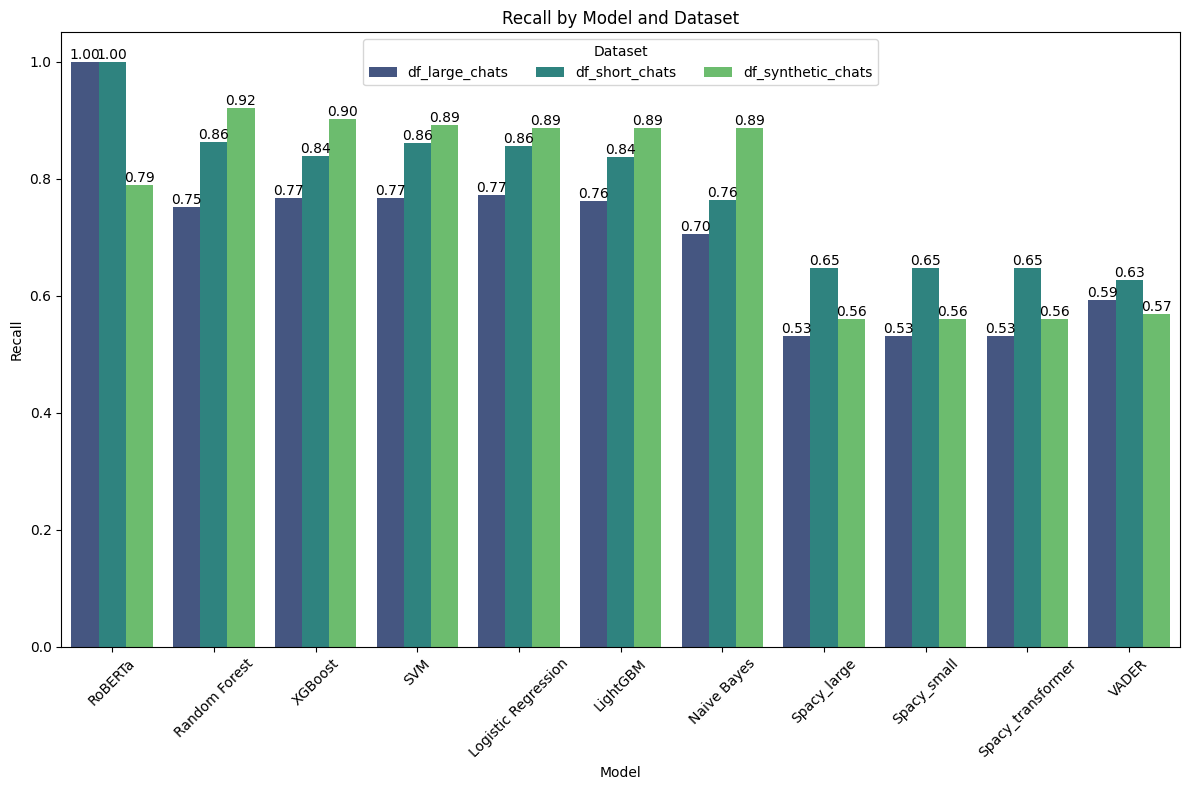

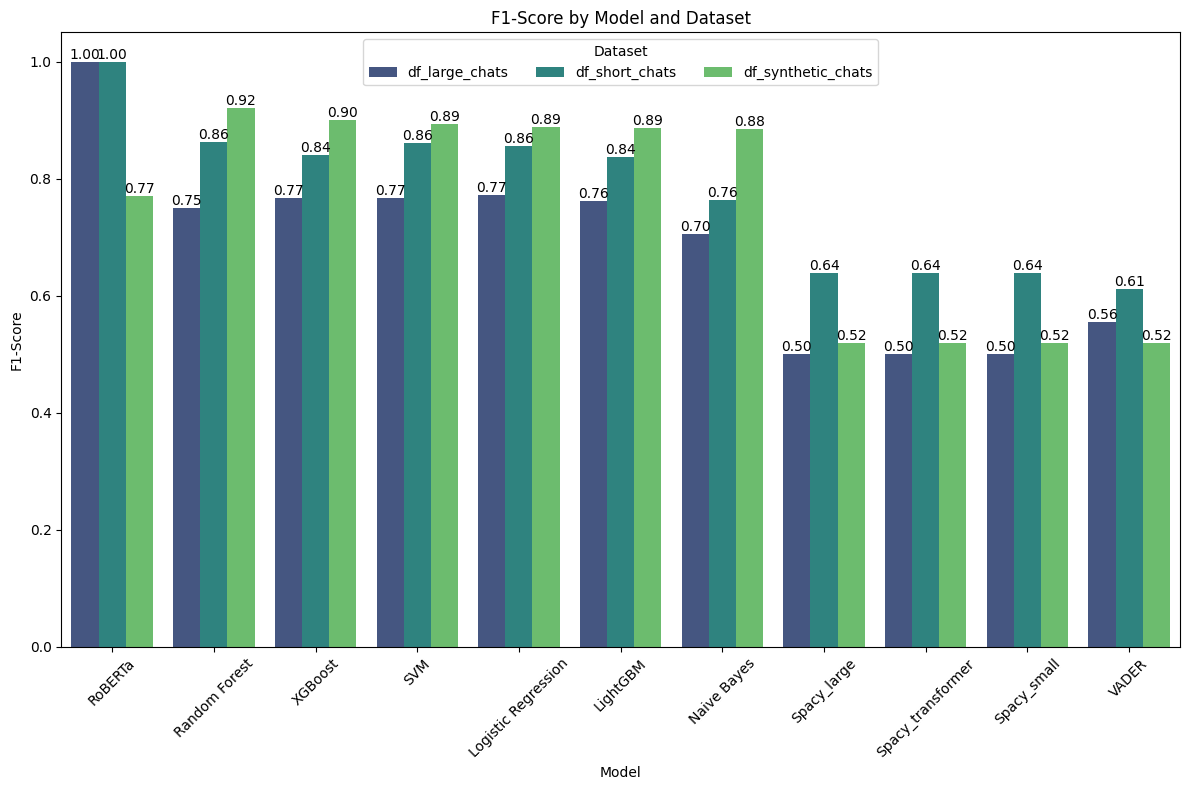

In [ ]:
df_results_sorted = df_results.sort_values(by=['Dataset','Model'], ascending=False)
# Define metrics to use
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Groupoeod plots for each metric
for metric in metrics:
    df_results_sorted = df_results.sort_values(by=[metric], ascending=False)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Model', y=metric, hue='Dataset', data=df_results_sorted, palette='viridis')
    # Plotting real value over the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')

    # Labels and tittle
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} by Model and Dataset')
    plt.legend(title='Dataset', loc='upper center', ncol=3)


    # Design, labels rotation and exporting
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'/content/drive/MyDrive/GreenFlashProject/images/{metric}_by_Model.png')
    plt.close()


##CONCLUSIONS_

- The metrics are extremely consistent across almost all models. This could be due to the fact that the least ambiguous messages were selected in the real conversations dataset. Remember that labels with less than 85% confidence were filtered out and additionally, all the dataframes were balanced to have exactly (±5) the same number of values for each class.

- Note how metrics are affected by text lenght. Large_chats_dataset has the worst metrics probably due to the inner ambiguety of longer texts. Maybe the best aproach is to analize longest conversations in diferent parts.(how starts and how ends the conversation).

- Sinthetyc_dataset has, as spected, the best results.

- The most consistent models are Logistic Regression and SVM, followed by XGBoost and LightGBM.
- I’m pleasantly surprised by the performance of a simple model like Logistic Regression.
- Also surprised by the low performance of VADER, Spacy ingeneral and, curiously, RoBERTa on the synthetic dataset. In fact, these results require further investigation on my part.


---


- Therefore, at least for now, our selection is limited to Logistic Regression and SVM, followed by XGBoost and LightGBM.



---



---



## Time and CO2 emissions plots by model and dataset



### First plot with all models

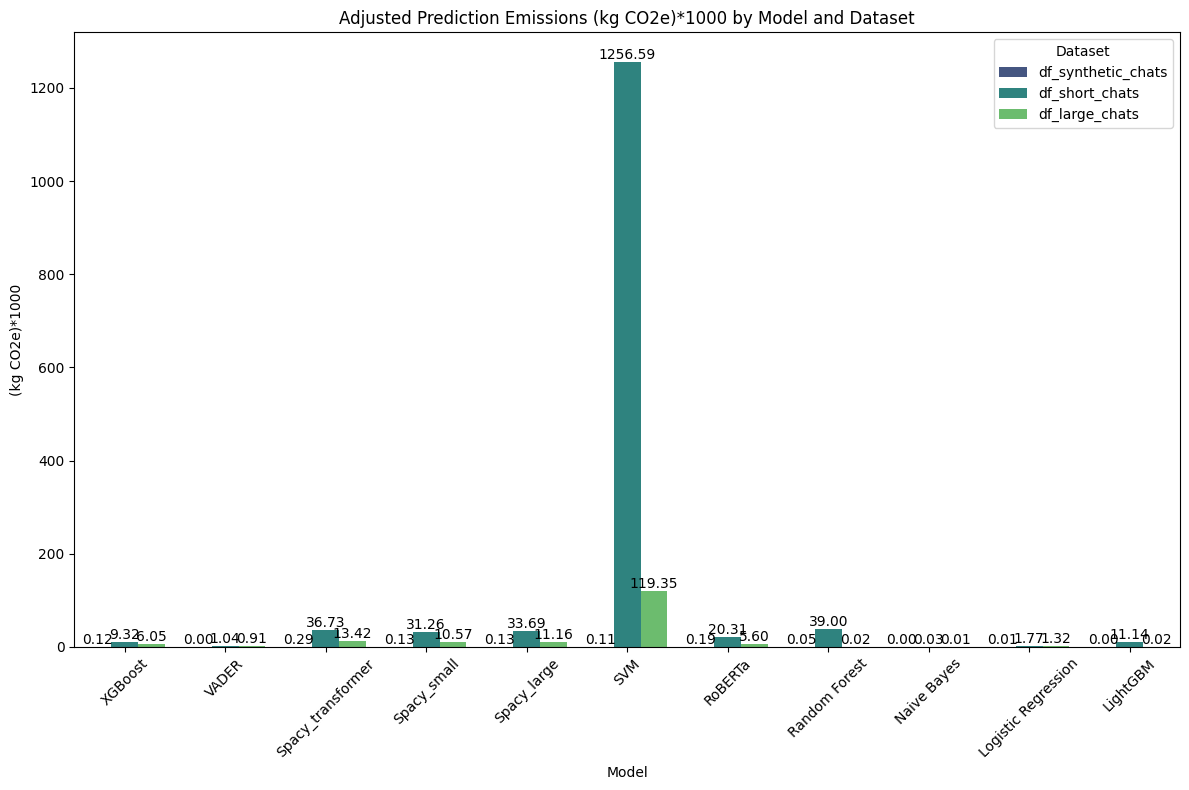

In [ ]:
df_results_sorted = df_results.sort_values(by=['Dataset','Model'], ascending=False)
# Define metrics to use
df_results_sorted = df_results.sort_values(by='Adjusted Prediction Emissions (kg CO2e)*1000', ascending=False)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y=df_results['Adjusted Prediction Emissions (kg CO2e)*1000'], hue='Dataset', data=df_results_sorted, palette='viridis')
# Plotting real value over the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Labels and tittle
plt.xlabel('Model')
plt.ylabel('(kg CO2e)*1000')
plt.title('Adjusted Prediction Emissions (kg CO2e)*1000 by Model and Dataset')
plt.legend(title='Dataset', loc='upper right')

# Design, labels rotation and exporting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/GreenFlashProject/images/Adjusted Prediction Emissions (kg CO2e)*100_by_Model_and_Dataset.png')
plt.close()

## It seems that SVM ca be filtered for the next plot if we want to explore tje diferences beteween the rest of models

###Second plot without SVM to clearly see the variations.




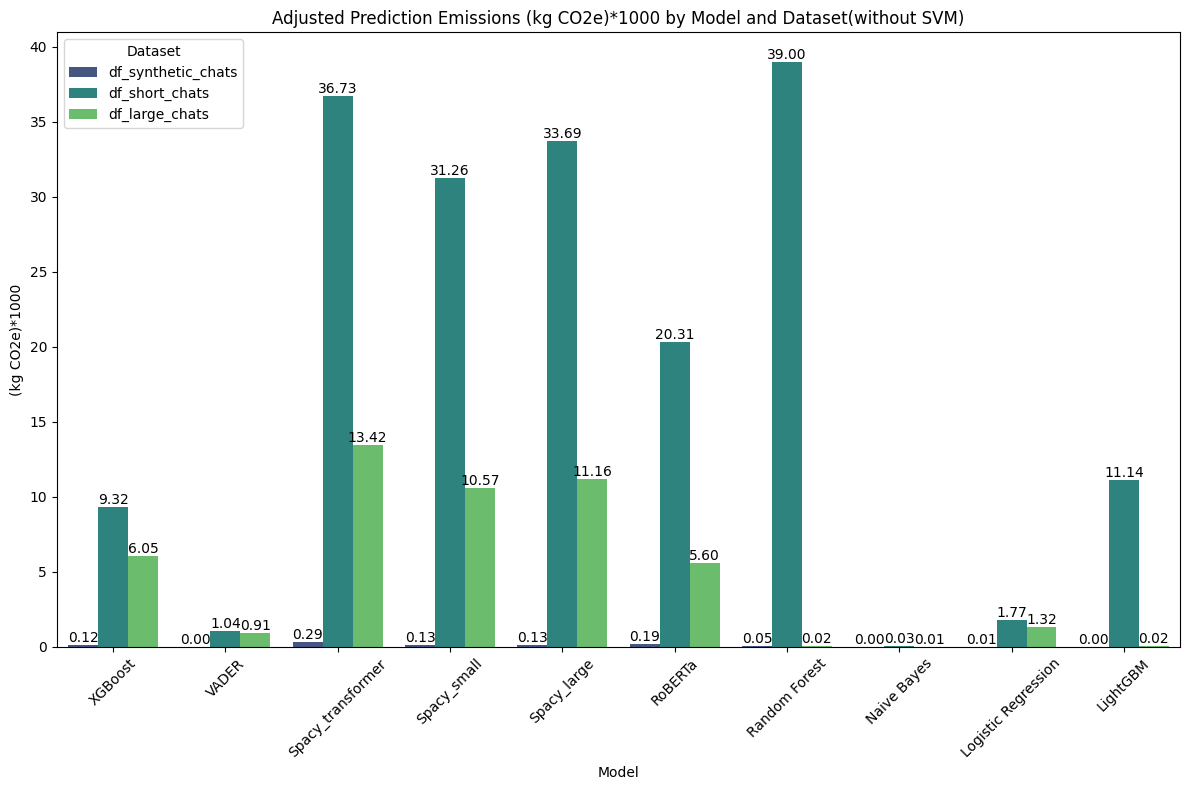

In [ ]:
df_results_sorted = df_results.sort_values(by=['Dataset','Model'], ascending=False)
# Filter dataset
df_results_noSVM = df_results[df_results['Model'] != 'SVM']

# Create plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y=df_results['Adjusted Prediction Emissions (kg CO2e)*1000'], hue='Dataset', data=df_results_noSVM, palette='viridis')
# Plotting real value over the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Labels and Tittle
plt.xlabel('Model')
plt.ylabel('(kg CO2e)*1000')
plt.title('Adjusted Prediction Emissions (kg CO2e)*1000 by Model and Dataset(without SVM)')
plt.legend(title='Dataset', loc='upper left')
# Design, labels rotation and exportingplt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/GreenFlashProject/images/Adjusted Prediction Emissions (kg CO2e)*100_by_Model_filtered_Datasets_without_SVM.png')
plt.close()



---



---



## CONCLUSIONS IN TERMS OF CO2 EMISSIONS:

- Naive Bayes is the most efficient in terms of power comsumption
- Our selection in terms of metrics were Logistic Regression and SVM, followed by XGBoost and LightGBM. taking in count its efficiency ***logistic regression still having a consistent emissions values through all datasets while LightGBM can be used in short conversations***.
- SVM is out of our selection for now as it is the less efficient model.



---



---



###First plot showing prediction time differences between all models.

Note that adjusted prediction time has been used for these plots because some models used the entire dataset (no training needed), while others used only 20%.

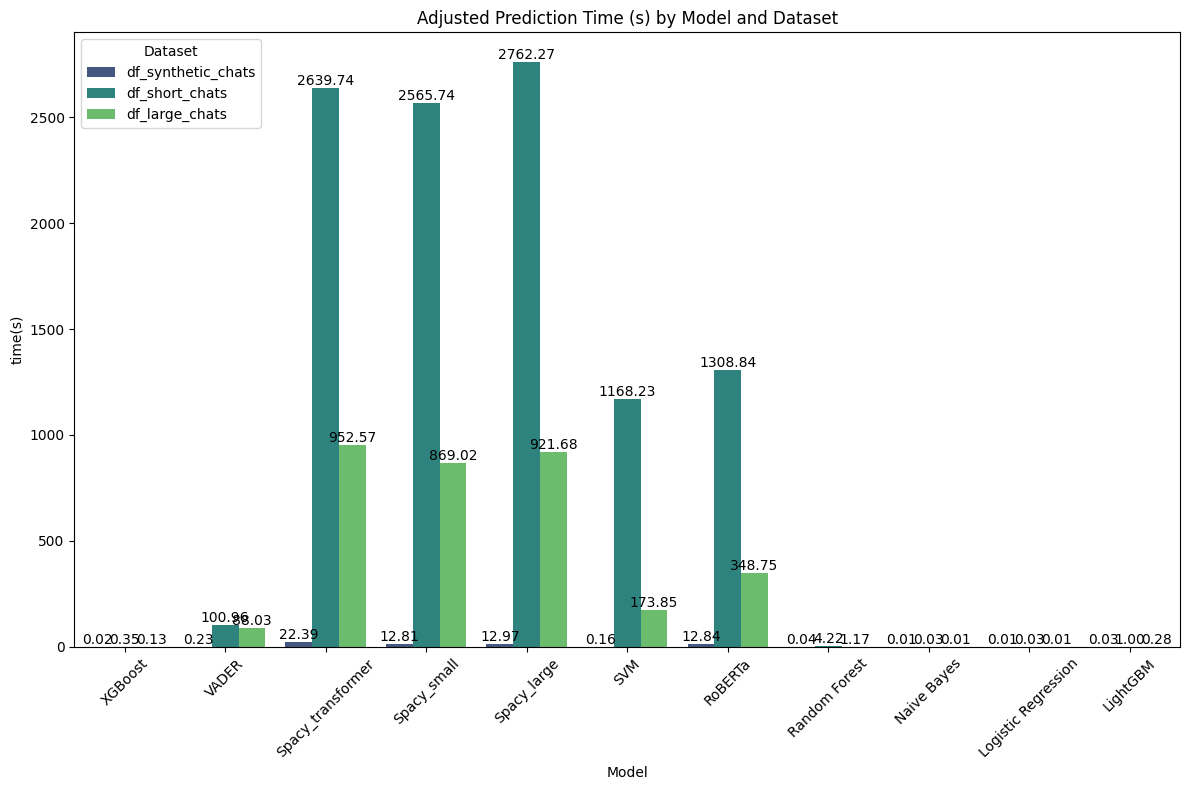

In [ ]:
# Create plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y=df_results['Adjusted Prediction Time (s)'], hue='Dataset', data=df_results, palette='viridis')
# Plotting real value over the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Labels and tittle
plt.xlabel('Model')
plt.ylabel('time(s)')
plt.title('Adjusted Prediction Time (s) by Model and Dataset')
plt.legend(title='Dataset', loc='upper left')

# Design, labels rotation and exporting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/GreenFlashProject/images/Adjusted Prediction Time (s)_by_Model_and_Dataset.png')
plt.close()

###Second plot of `prediction time` without SVM, RoBerta and Spacy_models to clearly see the variations.

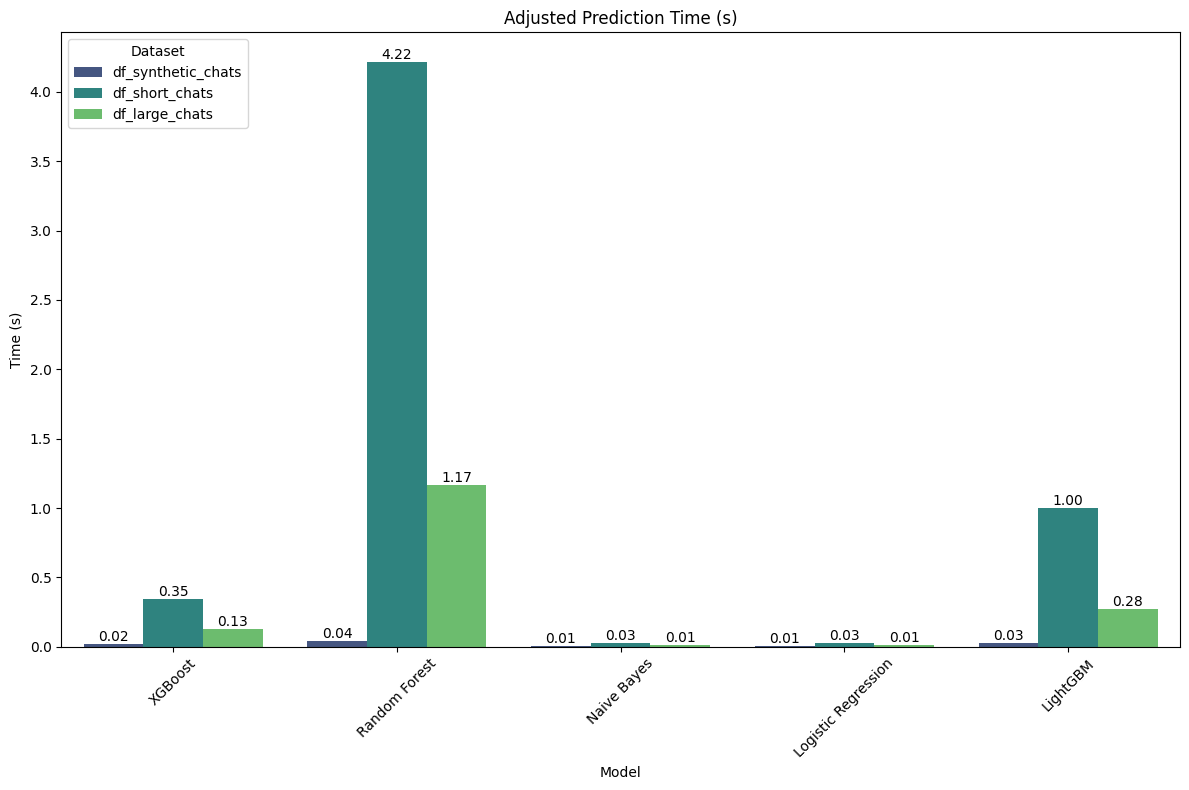

In [ ]:
# Filter dataset with the models we want to analyze
df_results_filtered = df_results[(df_results['Model'] != 'SVM')&(df_results['Model'] != 'RoBERTa')&(df_results['Model'] != 'VADER')&(df_results['Model'] != 'Spacy_transformer')&(df_results['Model'] != 'Spacy_large')&(df_results['Model'] != 'Spacy_small')]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y=df_results['Adjusted Prediction Time (s)'], hue='Dataset', data=df_results_filtered, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Labels and Tittle
plt.ylabel('Time (s)')
plt.title('Adjusted Prediction Time (s)')
plt.legend(title='Dataset', loc='upper left')


# Design rotation and exporting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/GreenFlashProject/images/Adjusted Prediction Time (s)_by_Model_filtered_Datasets.png')
plt.close()

##CONCLUSIONS IN TERMS OF PROCESSING TIME:
- Naive Bayes and logistic regresion are the fastest models along all datasets
- Roberta(with GPU),  SVM, and Spacy are the slowest models.





---



---

# CUSTOM METRIC

- This metric simply divides the performance metrics (good_metric) by the time and efficiency values to get a custom score.
- The weights of each value can be adjusted to give more importance to our preferred metric.

In [ ]:
# Custom metric function
def custom_metric(
        results_df,
        good_weights=None,
        bad_weights=None
    ):

    # Set default weights if not provided
    if good_weights is None:
        good_weights = {'Accuracy': 0.15, 'Recall': 0.15, 'Precision': 0.10, 'F1-Score':0.20}

    if bad_weights is None:
        bad_weights = {'Adjusted Prediction Time (s)': 0.20, 'Adjusted Prediction Emissions (kg CO2e)': 0.20}

    # Calculate the 'good' part of the custom metric
    results_df['Good Metric'] = (
        results_df['Accuracy'] * good_weights['Accuracy'] +
        results_df['Recall'] * good_weights['Recall'] +
        results_df['Precision'] * good_weights['Precision'] +
        results_df['F1-Score'] * good_weights['F1-Score']
    )

    # Calculate the 'bad' part of the custom metric
    results_df['Bad Metric'] = (
        results_df['Adjusted Prediction Time (s)'] * bad_weights['Adjusted Prediction Time (s)'] +
        results_df['Adjusted Prediction Emissions (kg CO2e)*1000'] * bad_weights['Adjusted Prediction Emissions (kg CO2e)']
    )

    # Calculate the final custom metric (higher is better)
    results_df['Custom Metric'] = results_df['Good Metric'] / (results_df['Bad Metric'] + 1e-6)  # Prevent division by zero
    results_df.drop(columns=['Good Metric',	'Bad Metric'], inplace=True)
    results_df.sort_values(by=['Custom Metric', 'Dataset'], ascending=False, inplace=True)
    return results_df


In [ ]:
df = custom_metric(df_results)

In [ ]:
df

,Model,Dataset,Training Time (s),Original Prediction Time (s),Adjusted Prediction Time (s),Training Emissions (kg CO2e),Original Prediction Emissions (kg CO2e),Adjusted Prediction Emissions (kg CO2e),Accuracy,Precision,Recall,F1-Score,Adjusted Prediction Emissions (kg CO2e)*1000,GPU,Good Metric,Bad Metric,Custom Metric
8,Naive Bayes,df_synthetic_chats,0.008471,0.001245,0.006225,3.075526e-07,6.766535e-07,3.383267e-06,0.887324,0.887432,0.887324,0.884736,0.00,0,0.531888,0.001245,426.868556
9,Logistic Regression,df_synthetic_chats,0.030896,0.001547,0.007735,8.606232e-07,1.235712e-06,6.178560e-06,0.887324,0.890640,0.887324,0.887730,0.01,0,0.532807,0.003547,150.166967
10,LightGBM,df_synthetic_chats,0.877248,0.005737,0.028685,8.084905e-08,8.284752e-08,4.142376e-07,0.887324,0.886489,0.887324,0.886518,0.00,0,0.532150,0.005737,92.740243
30,Naive Bayes,df_large_chats,0.052204,0.002984,0.014918,1.382725e-06,1.889255e-06,9.446275e-06,0.704866,0.705445,0.704866,0.704952,0.01,0,0.422995,0.004984,84.860814
19,Naive Bayes,df_short_chats,0.227476,0.005969,0.029845,5.705493e-06,6.280578e-06,3.140289e-05,0.764238,0.779839,0.764238,0.763695,0.03,0,0.459994,0.011969,38.428781
7,Random Forest,df_synthetic_chats,0.366300,0.008888,0.044441,9.174521e-06,9.759814e-06,4.879907e-05,0.920188,0.922232,0.920188,0.920021,0.05,0,0.552284,0.018888,29.238001
0,XGBoost,df_synthetic_chats,0.970652,0.004338,0.021689,2.419977e-05,2.468866e-05,1.234433e-04,0.901408,0.900731,0.901408,0.900868,0.12,0,0.540669,0.028338,19.078769
5,SVM,df_synthetic_chats,0.828634,0.032706,0.163528,2.064772e-05,2.181290e-05,1.090645e-04,0.892019,0.895758,0.892019,0.892990,0.11,0,0.535779,0.054706,9.793700
32,LightGBM,df_large_chats,44.114738,0.055046,0.275230,4.052337e-06,4.058871e-06,2.029436e-05,0.762164,0.761182,0.762164,0.761370,0.02,0,0.457042,0.059046,7.740290
1,VADER,df_synthetic_chats,0.000000,0.231574,0.231574,0.000000e+00,2.376904e-06,2.376904e-06,0.569144,0.722102,0.569144,0.518853,0.00,0,0.346724,0.046315,7.486097


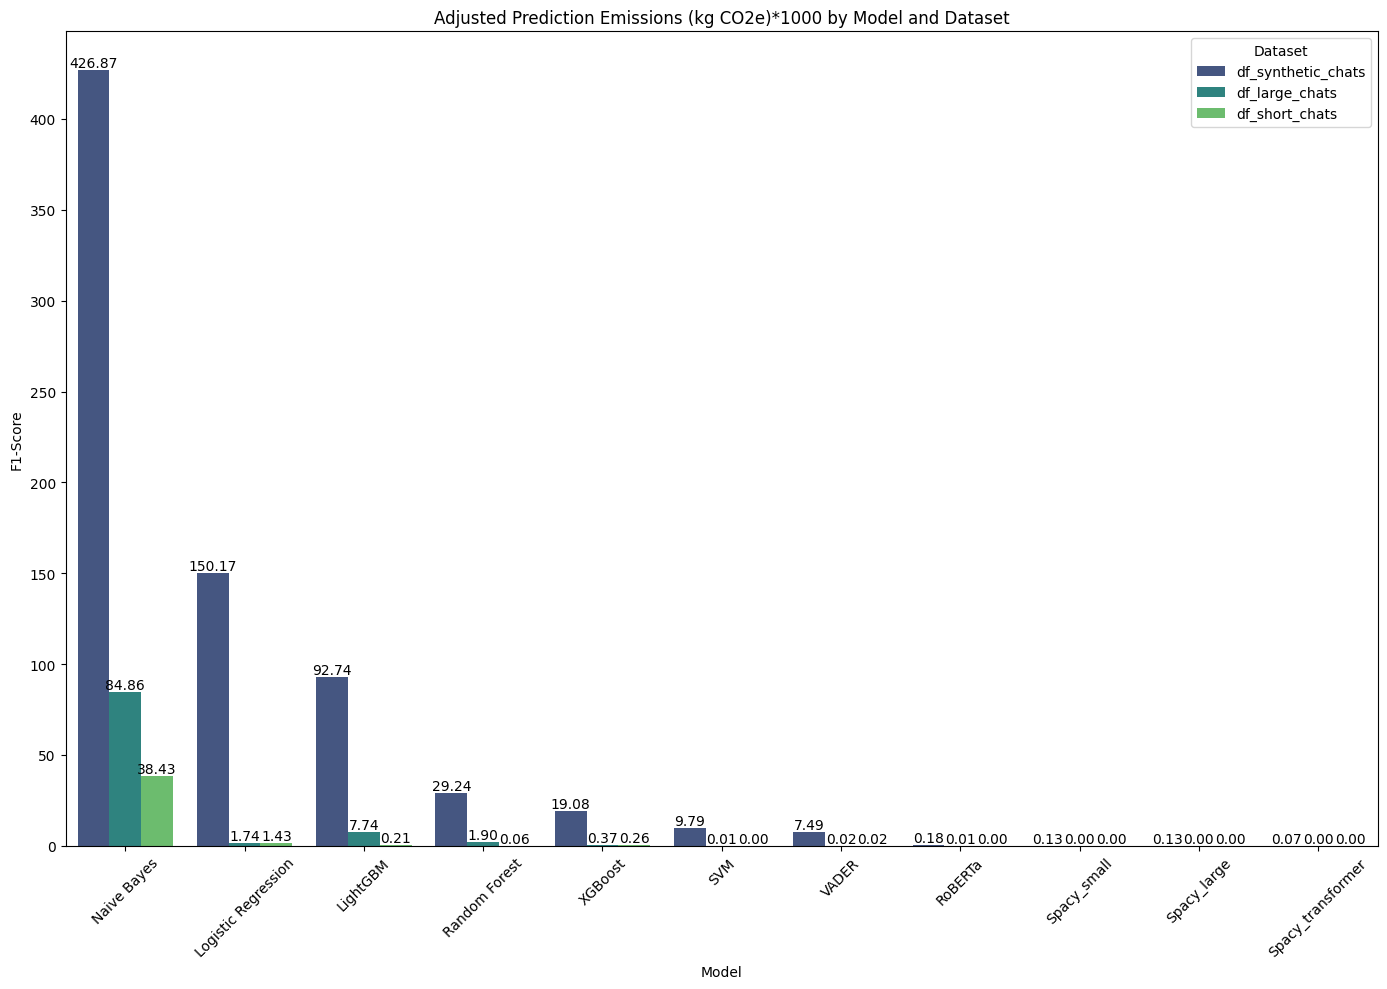

In [ ]:
# Create graph
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Model', y=df_results['Custom Metric'], hue='Dataset', data=df_results, palette='viridis')
# Real values over the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Labels and Tittle
plt.xlabel('Model')
plt.ylabel(metric)
plt.title('Adjusted Prediction Emissions (kg CO2e)*1000 by Model and Dataset')
plt.legend(title='Dataset', loc='upper right')

# Design, label rotation and exporting image
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/GreenFlashProject/images/Custom Metric_by_Model_and_Dataset.png')
plt.close()

#FINAL CONCLUSIONS

- If we rely on aour metric results Naive Bayes is the best option in terms of metrics/efficiency

- Logistic Regression still being a good choice with better metrics than Naive Bayes and the second position in the custom_metric.

- The worst performance models will be testet again to be shure theres no issues with the code.

